## Analysis Overview

This notebook will analyze the stock price of Bank Central Asia (BCA) with the ticker symbol **BBCA.JK** or **BBCA** in short.

BBCA is a banking company headquartered and listed publicly in Indonesia.
Source: https://simplywall.st/stocks/id/banks/market-cap-large

This notebook will attempt to historically extrapolate BBCA's trend, comparing it with other large banks in Indonesia, which are mostly state-owned banks.

## Preliminary prep - Importing and Organizing Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Fetching the data from Yahoo Finance
ticker = {'BCA' : 'BBCA.JK', 'IHSG' : '^JKSE', 'BTN' : 'BBTN.JK', 'MANDIRI' : 'BMRI.JK', 'BNI' : 'BBNI.JK', 'BRI': 'BBRI.JK'}
data = pd.DataFrame()

for t in ticker:
    data[t] = yf.download(ticker[t], start='2010-12-31', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# Checking data completeness - starting date
data.head()

,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2011-01-03,1005.559570,3727.372070,1012.174438,891.322021,1221.219482,552.083252
2011-01-04,1013.354553,3759.914795,1030.357178,912.050293,1229.253906,549.416138
2011-01-05,1028.944580,3783.561768,1066.722656,946.597595,1245.322388,565.418579
2011-01-06,1021.149658,3736.111816,1042.479126,925.869202,1205.150757,552.083252
2011-01-07,997.764465,3631.311768,969.747864,884.412537,1140.876221,522.745361


In [3]:
# Checking data completeness - ending date
data.tail()

,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2025-05-20,9475.0,7094.602051,1230.0,5400.0,4450.0,4210.0
2025-05-21,9700.0,7142.460938,1275.0,5450.0,4520.0,4260.0
2025-05-22,9650.0,7166.980957,1275.0,5450.0,4470.0,4300.0
2025-05-23,9675.0,7214.163086,1270.0,5425.0,4510.0,4350.0
2025-05-26,9600.0,7175.793945,1255.0,5450.0,4470.0,4290.0


In [4]:
# Checking data completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3545 entries, 2011-01-03 to 2025-05-26
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BCA      3545 non-null   float64
 1   IHSG     3493 non-null   float64
 2   BTN      3545 non-null   float64
 3   MANDIRI  3545 non-null   float64
 4   BNI      3545 non-null   float64
 5   BRI      3545 non-null   float64
dtypes: float64(6)
memory usage: 193.9 KB


It looks like there are some missing rows for the market index (IHSG / ticker:^JKSE) data. A check on which rows are missing is needed. The code is run below:

In [5]:
# Checking the missing data -- Market close
missing_rows = data[data.isnull().any(axis=1)]
missing_rows

,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2014-04-09,1778.717773,NaN,928.337524,1554.138550,1765.645386,1146.984985
2014-07-09,1848.172852,NaN,778.830017,1538.976562,1742.017578,1293.591187
2015-12-09,2161.695557,NaN,905.321838,1388.898193,1783.576782,1290.749390
2017-01-02,2606.081787,NaN,1256.822754,1833.268188,2018.848511,1421.294189
2017-02-15,2606.081787,NaN,1466.293091,1809.510864,2302.035400,1460.858887
2017-04-19,2867.156250,NaN,1690.125854,1903.947876,2394.144775,1619.981201
2017-06-01,2905.272217,NaN,1845.115601,2041.680420,2469.551025,1821.299072
2017-06-23,3074.675537,NaN,1918.920044,2065.986084,2488.402344,1918.812500
2017-06-26,3074.675537,NaN,1918.920044,2065.986084,2488.402344,1918.812500


Further inspection revealed that missing rows from the market index might be due to public holidays or when the market is closed domestically. Individual stock prices were still shown despite the closed market.
There might be technical issues as well, attributed to the Indonesian's stock market index value opening hour / days.

A data interpolation could be used to fill in the gaps, employing a rather straightforward statistical guesstimate of the values to normalize the dataset.

## Stock price(s) exploratory - _Historical_  trend analysis

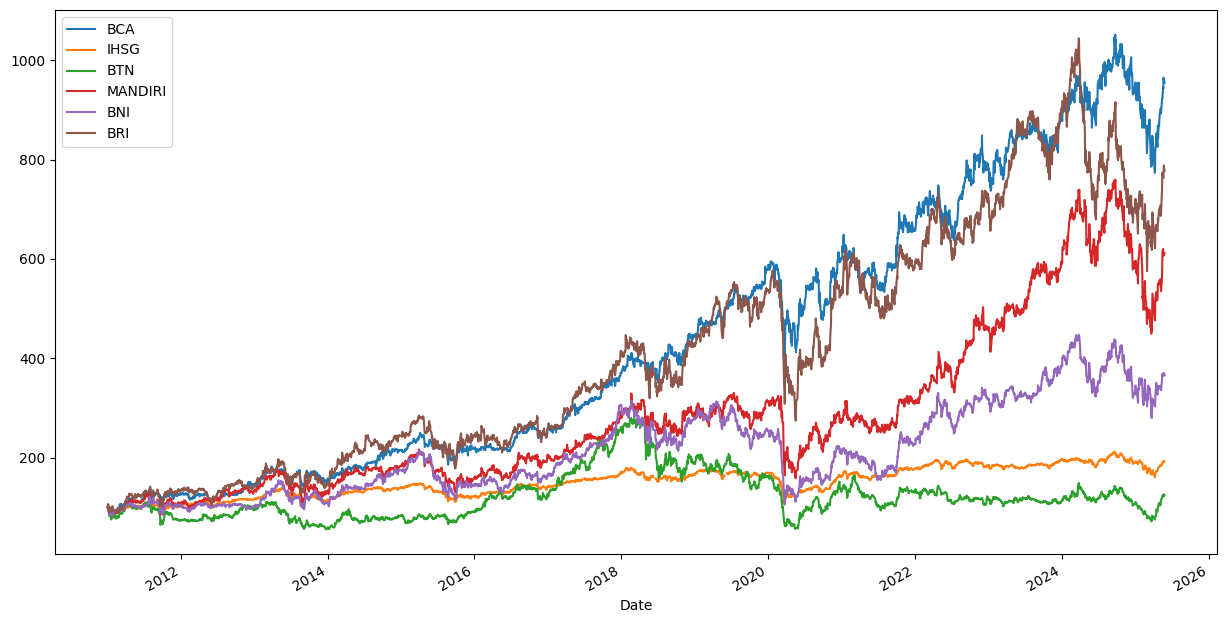

In [6]:
# Normalized comparation BBCA against IHSG
normalized_data = (data / data.iloc[0]) * 100

normalized_data.plot(figsize = (15, 8))
plt.show()

**Descriptively: A clear and obvious decline of the whole market occurred during the Covid-19 pandemic inception, followed by a steady increase of stock price of several but NOT ALL observed Banks.**

1. Bank Central Asia (BCA) led the roster, experiencing the least decline during the pandemic and outperforming other observed Banks.
2. Bank Rakyat Indonesia (BRI) and Bank Mandiri (MANDIRI) followed with BRI performing in closely mirroring those of BCA.
3. Bank Negara Indonesia (BNI) rebounded from its decline during the pandemic, though did not perform as well as the top three banks: BCA, BRI, and MANDIRI. Signaling a stagnation of perceived stock price, albeit the economy's improment.
4. Bank Tabungan Negara (BTN) practically failed in its perceived price within the stock market, failing to bounce back to their pre-pandemic value.
5. Indonesia Stock Market Index (IHSG) experienced a stagnant (sideways) growth after the pandemic. Though their nominal value did reflect a steady improvement

----

**Recent major changes**: Newly elected President brought an obvious negative sentiment within the stock market.
- All observed Banks experienced a **significant** decline in perceived stock price, especially state-owned banks.
- BCA experienced a **significant** decline, albeit still outperformed the other observed banks that are owned by the State.

This negative sentiment came from the current governmental political and invesment decision:
- Budget efficiency measures within the government impacting government officials restricting their day-to-day work necessities: limited office hour, limited use of electrical equipment, etc.
- A cut in higher-educational sector reflected in decreased budget allocated to state-owned universities, reflected poorly to the current administration's priority with education.
- An establishment of new Sovereign Wealth Fund called *The Agency for Investment Management Daya Anagata Nusantara* (Danantara) without much credibility, amidst multiple corruption cases and nepotism allegation to the current and previous adminisitration's family and close circle. This raised the question whether the current admninistration will handle Danantara with the required *Competence* and *Integrity*

#### Stock returns extrapolation analysis

In [7]:
# Calculating the log returns for the observed data set
log_returns = np.log(1+ data.pct_change())
log_returns.tail()

<ipython-input-7-02001d1534c4>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  log_returns = np.log(1+ data.pct_change())


,BCA,IHSG,BTN,MANDIRI,BNI,BRI
Date,,,,,,
2025-05-20,-0.002635,-0.006531,-0.008097,-0.022884,-0.002245,-0.004739
2025-05-21,0.023469,0.006723,0.035932,0.009217,0.015608,0.011807
2025-05-22,-0.005168,0.003427,0.000000,0.000000,-0.011124,0.009346
2025-05-23,0.002587,0.006562,-0.003929,-0.004598,0.008909,0.011561
2025-05-26,-0.007782,-0.005333,-0.011881,0.004598,-0.008909,-0.013889


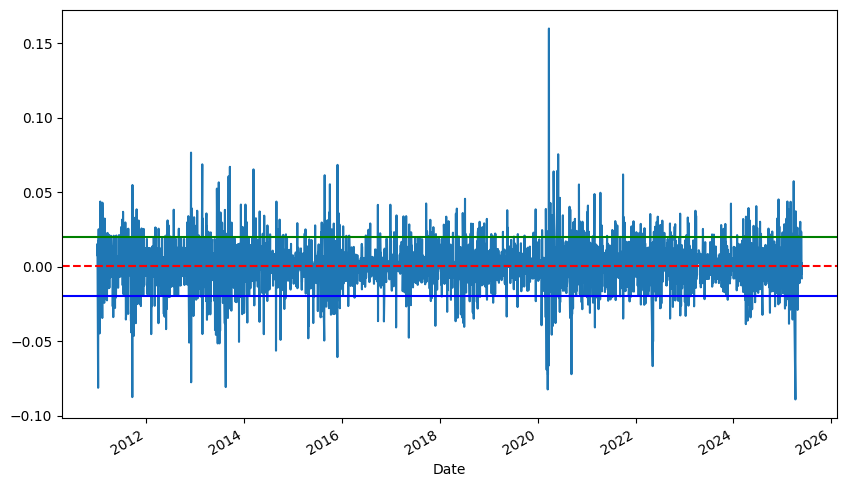

In [8]:
# Plotting the stock price to see the distribution of mean
log_returns['BCA'].plot(figsize = (10, 6))

# Add a horizontal line at a specific y-value (e.g., mean)
plt.axhline(y=log_returns['BCA'].mean(), color='r', linestyle='--', label='Mean')
# Add additional horizontal lines if needed (e.g., specific thresholds)
plt.axhline(y=0.02, color='g', linestyle='-', label='Threshold 1')
plt.axhline(y=-0.02, color='b', linestyle='-', label='Threshold 2')

plt.show()

An obvious volatility occurred during the Pandemic. A somewhat more stable period followed after, with less high volatilies occurring like those in the 2010-2012, 2013, and 2015

## Comparing BBCA returns and volatilities with other banks

In [9]:
# Calculating and comparing average daily returns and volatility
daily_comparison = pd.DataFrame()
daily_comparison['Daily Returns'] = round(log_returns.mean(), 5)
daily_comparison['Daily Volatility'] = round(log_returns.std(), 5)

daily_comparison

,Daily Returns,Daily Volatility
BCA,0.00064,0.01560
IHSG,0.00018,0.01035
BTN,0.00006,0.02431
MANDIRI,0.00051,0.02083
BNI,0.00037,0.02086
BRI,0.00058,0.02069


BCA **outperformed** other major state-owned banks with the highest average _daily returns_ and the lowest _volatility_, just after the market index

In [10]:
# Calculating and comparing average annual returns and volatility
annual_comparison = pd.DataFrame()
annual_comparison['Annual Returns'] = round(log_returns.mean() * 250, 5)
annual_comparison['Annual Volatility'] = round(log_returns.std() * 250 ** 0.5, 5)


annual_comparison

,Annual Returns,Annual Volatility
BCA,0.15916,0.24670
IHSG,0.04621,0.16367
BTN,0.01517,0.38437
MANDIRI,0.12773,0.32932
BNI,0.09153,0.32985
BRI,0.14463,0.32710


BCA **outperformed** other major state-owned banks with the highest average _annual returns_ and the lowest _annual volatility_, just after the market index

<Axes: title={'center': 'Stock Returns Correlation'}>

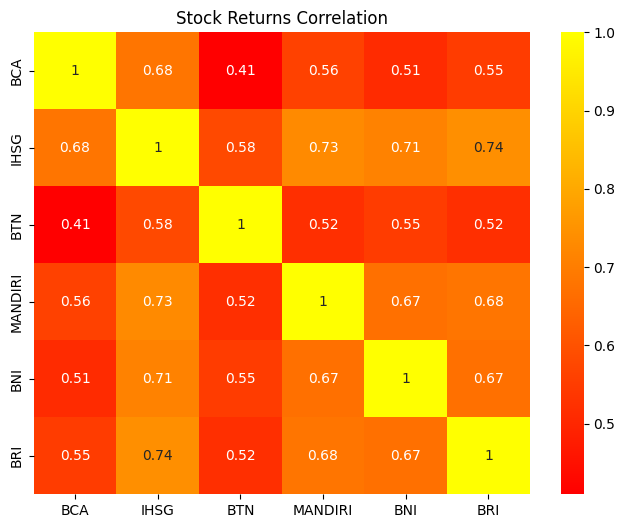

In [12]:
# Calculating the correlation between observed banks' returns
corr_matrix_returns = round(log_returns.corr(), 2)

# Displaying the correlation on a heatmap
plt.figure(figsize= (8, 6))
plt.title('Stock Returns Correlation')
sns.heatmap(corr_matrix_returns, annot=True, cmap='autumn')

BCA basically has the lowest correlation with other major state-owned banks in Indonesia. This descriptively portrayed how BCA's returns has little similarity in market sentiment with state-owned banks in Indonesian stock market.

## Regression analysis on BBCA stock

Prior exploratory analysis showed that BBCA has the highest correlation with the stock market index (IHSG). A regression analysis was done to see the linearity of their relationship to observe how Indonesian stock market sentiment correlates with BBCA

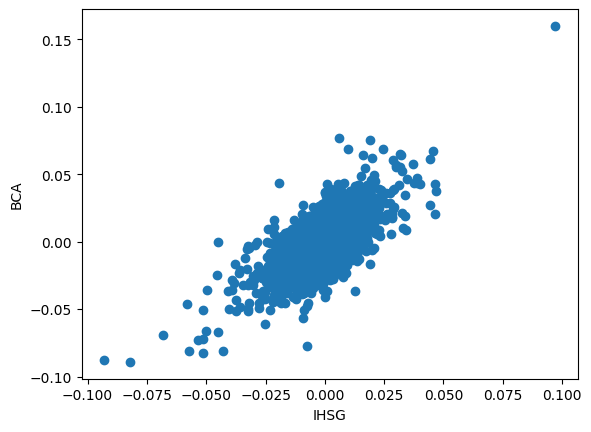

In [24]:
# Displaying observed data on a scatter plot

# Assigning the variables
X = log_returns['IHSG']
Y = log_returns['BCA']
plt.scatter(X, Y)
plt.xlabel('IHSG')
plt.ylabel('BCA')
plt.show()

In [25]:
# Running the regression

# Reassigning variable X as a constant.
X1 = sm.add_constant(X)

# Cleaning NaN row and organising the dataset
X1 = X1[1:] # deleting the NaN row
Y = Y[1:] # adjusting dataset rows

# Run and display the OLS regression
regression = sm.OLS(Y, X1).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    BCA   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3069.
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        08:53:00   Log-Likelihood:                 10822.
No. Observations:                3544   AIC:                        -2.164e+04
Df Residuals:                    3542   BIC:                        -2.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.328      0.0